In [64]:
import numpy as np
from pbcpy.grid import Grid, Grid_Space as gs, Grid_Function as gf, Grid_Function_Reciprocal as gfr
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
at = np.identity(3)
at[0,0]=2
at

array([[ 2.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [66]:
nr = [1001,1,1]
alpha=0.1

In [67]:
grid = gs(at, nr, conv_type='')
gf_func = gf(grid)
gf_func.ndim

1

In [68]:
invgrid_g = grid.reciprocal_grid.r

In [69]:
invgrid_gg = grid.reciprocal_grid.dist_values()

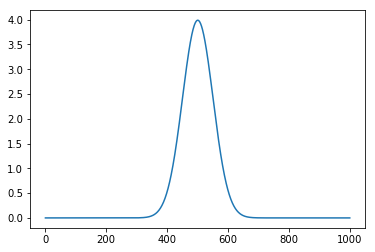

In [70]:
dens = gf_func.gaussian(alpha=alpha,center_array=[0.5,0.,0.])
plt.plot(dens.values[:,0,0])
plt.show()

In [71]:
densFFT = dens.fft()

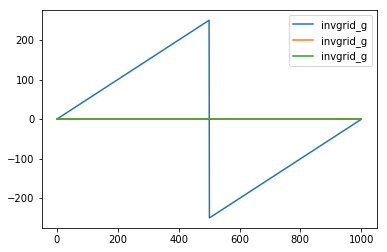

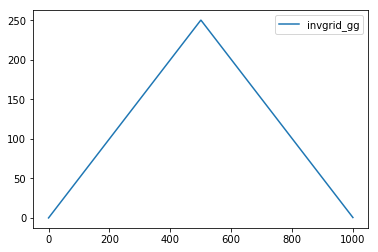

In [72]:
plt.plot(invgrid_g[:,0,0],label='invgrid_g')
plt.legend()
plt.show()
plt.plot(invgrid_gg[:,0,0],label='invgrid_gg')
plt.legend()
plt.show()

In [73]:
my_densFFT = np.exp(-2.0*(np.pi*invgrid_gg[:30,0,0]*alpha)**2)*np.exp(2.0*np.pi*invgrid_gg[:30,0,0]*1.0j)

In [74]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,4))

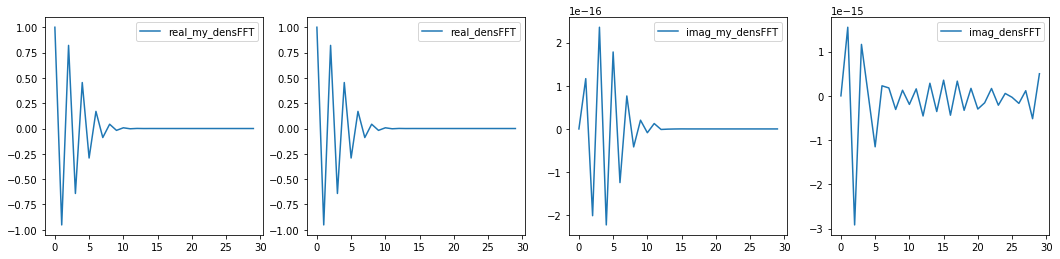

In [75]:
ax1.plot(np.real(my_densFFT),label='real_my_densFFT')
ax2.plot(np.real(densFFT.values[:30,0,0]),label='real_densFFT')
ax3.plot(np.imag(my_densFFT),label='imag_my_densFFT')
ax4.plot(np.imag(densFFT.values[:30,0,0]),label='imag_densFFT')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [76]:
densFFT_IFFT = densFFT.ifft()

In [77]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,4))

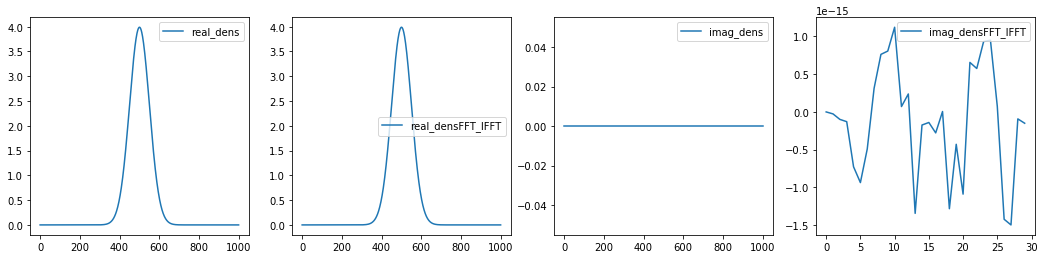

In [78]:
ax1.plot(np.real(dens.values[:,0,0]),label='real_dens')
ax2.plot(np.real(densFFT_IFFT.values[:,0,0]),label='real_densFFT_IFFT')
ax3.plot(np.imag(dens.values[:,0,0]),label='imag_dens')
ax4.plot(np.imag(densFFT_IFFT.values[:30,0,0]),label='imag_densFFT_IFFT')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()